In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn-v0_8")

In [2]:
# plt.rc("text.latex", preamble=r"\usepackage{amsmath} \usepackage{amssymb}")
# plt.rcParams.update(
#     {
#         "text.usetex": True, 
#         "font.family": "serif",
#         "font.serif": ["Computer Modern Roman"],
#         # 'font.sans-serif' : ['Tahoma', 'DejaVu Sans','Lucida Grande', 'Verdana'],
#         "image.cmap": "viridis",
#         "figure.figsize": [8, 8],
#         "savefig.dpi": 200,
#     }
# )

In [3]:
def quartic_function(roots):
    @np.vectorize
    def func(x):
        prod = 1
        for xi in roots:
            prod *= x - xi
        return prod

    @np.vectorize
    def grad(x):
        summ = 0
        for i in range(len(roots)):
            prod = 1
            for j, xj in enumerate(roots):
                if i != j:
                    prod *= x - xj
            summ += prod
        return summ

    return func, grad


In [4]:
fun, grad = quartic_function([-3, 2, 3, 3])
poly = np.polynomial.Polynomial.fromroots([-3, 2, 3, 3])

grad = poly.deriv()
hess = grad.deriv()


In [5]:
def tangent(x):
    xy1 = (x, fun(x))
    slope = grad(x)
    plt.axline(xy1, slope=slope)


def quadratic_approx(x0, fun, grad, hess):
    return np.polynomial.Polynomial((fun(x0), grad(x0), hess(x0) / 2))


-4 294.0
-2.604575163398693 -57.19247700737154
-1.87640442834148 -103.57108690498339
-1.6280712844777836 -106.61233052234542


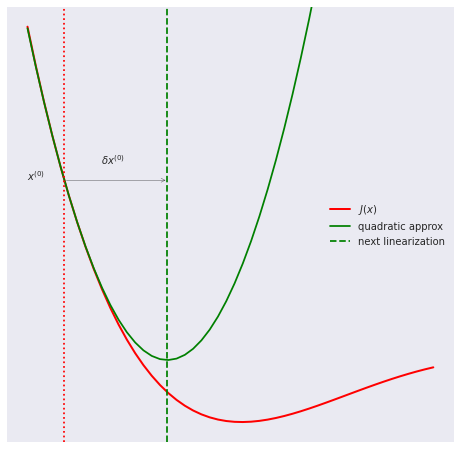

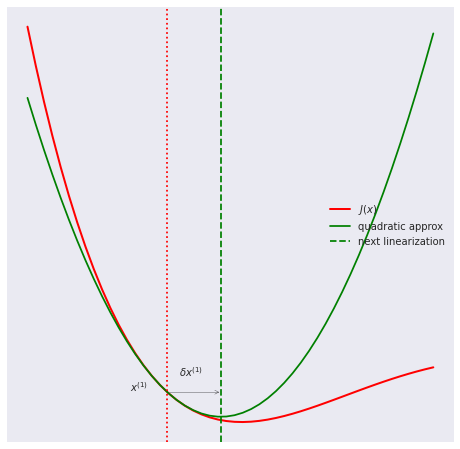

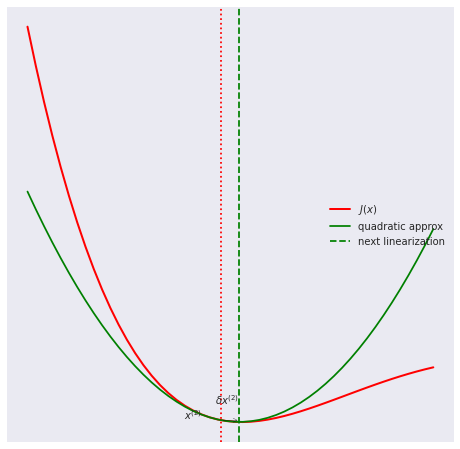

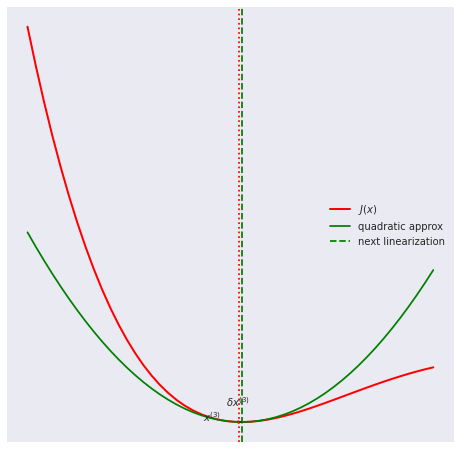

In [7]:
x = np.linspace(-4.5, 1, 50)
x0 = -4
# plt.figure(figsize=(15, 8))
for i in range(4):
    plt.figure(figsize=(8, 8))
    print((x0), poly(x0))
    plt.plot(x, poly(x), label=r"$J(x)$", color="red", linewidth=2)

    quad = quadratic_approx(x0, poly, grad, hess)
    root = quad.deriv().roots() + x0
    plt.annotate(
        "",
        xytext=(x0, poly(x0)),
        xy=(root[0], poly(x0)),
        arrowprops=dict(arrowstyle="->", facecolor="black", ),
    )
    plt.text(s=f"$x^{{({i})}}$", x = x0-0.5, y = poly(x0))
    plt.text(s=f"$\delta x^{{({i})}}$", x = (x0 + root[0])/ 2- 0.2, y = poly(x0)+25)

    xlim = plt.xlim()
    ylim = plt.ylim()
    plt.plot(x, quad(x - x0), label="quadratic approx", color='green')
    plt.axvline(x0, ls=":", color="red")
    plt.axvline(root, ls="--", color='green', label="next linearization")
    plt.legend(loc=7)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.yticks([])
    plt.xticks([])
    # plt.legend()
    x0 = root[0]
    plt.savefig(f'GN_{i}.png')


In [ ]:
print(quad.deriv().roots())
root


In [ ]:
x


In [ ]:
import torch


In [ ]:
def eye_like(tensor):
    return torch.eye(*tensor.size(), out=torch.empty_like(tensor))


In [ ]:
x = torch.randn(10 * 5 * 5).reshape(10, 5, 5)


In [ ]:
x.shape


In [ ]:
torch.eye(*x.size()[1:], out=torch.empty_like(x))


In [ ]:
torch.eye(5, out=torch.empty_like(x))


In [ ]:
x.shape


In [ ]:
torch.eye(x.shape[-1])


In [ ]:
b = x.shape[0]
eye = torch.empty_like(x)
for i in range(b):
    eye[i, :, :] = torch.eye(x.shape[-1])


In [ ]:
torch.bmm(eye, x) - x
torch.linalg.norm(eye)


In [ ]:
x = torch.randn((10, 5, 3))


In [ ]:
torch.linalg.norm(x, dim=1)


In [ ]:
xn = torch.nn.functional.normalize(x)


In [ ]:
torch.linalg.norm(xn[5, :, 2])


In [ ]:
xn
